<a href="https://colab.research.google.com/github/Unnati-Agrawal/XGBoost/blob/main/ml_heart_xgboost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/heart1.csv')
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['oldpeak'] = df['oldpeak'].astype(int)
print(df['age'].value_counts())
print(df['gender'].value_counts())
print(df['cp'].value_counts())
print(df['trestbps'].value_counts())
print(df['chol'].value_counts())
print(df['fbs'].value_counts())
print(df['restecg'].value_counts())
print(df['thalach'].value_counts())
print(df['exang'].value_counts())
print(df['oldpeak'].value_counts())
print(df['slope'].value_counts())
print(df['ca'].value_counts())
print(df['thal'].value_counts())


58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
1    207
0     96
Name: gender, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbp

In [ ]:
df['gender'][df['gender'] == 1] = 'female'
df['gender'][df['gender'] == 0] = 'male'

df['cp'][df['cp']==0]='no pain'
df['cp'][df['cp']==1]='mild pain'
df['cp'][df['cp']==2]='normal pain'
df['cp'][df['cp']==3]='heavy pain'

df['fbs'][df['fbs'] == 0] = 'low'
df['fbs'][df['fbs'] == 1] = 'high'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['slope'][df['slope'] == 0] = 'normal'
df['slope'][df['slope'] == 1] = 'low'
df['slope'][df['slope'] == 2] = 'high'
df.head()

<ipython-input-27-57dcabd91f90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp'][df['cp']==0]='no pain'
<ipython-input-27-57dcabd91f90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'][df['fbs'] == 0] = 'low'
<ipython-input-27-57dcabd91f90>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exang'][df['exang'] == 0] = 'no'
<ipython-input-27-57dcabd91f90>:15: SettingWithCopyWarning: 
A value is trying to be set on 

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,heavy pain,145,233,high,0,150,no,2,normal,0,1,1
1,37,female,normal pain,130,250,low,1,187,no,3,normal,0,2,1
2,41,male,mild pain,130,204,low,0,172,no,1,high,0,2,1
3,56,female,mild pain,120,236,low,1,178,no,0,high,0,2,1
4,57,male,no pain,120,354,low,1,163,yes,0,high,0,2,1


In [ ]:
df.gender = df.gender.astype("category")
df.cp = df.cp.astype("category")
df.fbs = df.fbs.astype("category")
df.exang = df.exang.astype("category")
df.slope = df.slope.astype("category")
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,heavy pain,145,233,high,0,150,no,2,normal,0,1,1
1,37,female,normal pain,130,250,low,1,187,no,3,normal,0,2,1
2,41,male,mild pain,130,204,low,0,172,no,1,high,0,2,1
3,56,female,mild pain,120,236,low,1,178,no,0,high,0,2,1
4,57,male,no pain,120,354,low,1,163,yes,0,high,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   gender    303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    int64   
 10  slope     303 non-null    category
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    int64   
dtypes: category(5), int64(9)
memory usage: 23.6 KB


In [ ]:
#one hot encoding
df = pd.get_dummies(df, columns = ['gender','cp','fbs', 'exang','slope'])
print(df)

     age  trestbps  chol  restecg  thalach  oldpeak  ca  thal  target  \
0     63       145   233        0      150        2   0     1       1   
1     37       130   250        1      187        3   0     2       1   
2     41       130   204        0      172        1   0     2       1   
3     56       120   236        1      178        0   0     2       1   
4     57       120   354        1      163        0   0     2       1   
..   ...       ...   ...      ...      ...      ...  ..   ...     ...   
298   57       140   241        1      123        0   0     3       0   
299   45       110   264        1      132        1   0     3       0   
300   68       144   193        1      141        3   2     3       0   
301   57       130   131        1      115        1   1     3       0   
302   57       130   236        0      174        0   1     2       0   

     gender_female  ...  cp_mild pain  cp_no pain  cp_normal pain  fbs_high  \
0                1  ...             0       

In [ ]:
df.head(50)

,age,trestbps,chol,restecg,thalach,oldpeak,ca,thal,target,gender_female,...,cp_mild pain,cp_no pain,cp_normal pain,fbs_high,fbs_low,exang_no,exang_yes,slope_high,slope_low,slope_normal
0,63,145,233,0,150,2,0,1,1,1,...,0,0,0,1,0,1,0,0,0,1
1,37,130,250,1,187,3,0,2,1,1,...,0,0,1,0,1,1,0,0,0,1
2,41,130,204,0,172,1,0,2,1,0,...,1,0,0,0,1,1,0,1,0,0
3,56,120,236,1,178,0,0,2,1,1,...,1,0,0,0,1,1,0,1,0,0
4,57,120,354,1,163,0,0,2,1,0,...,0,1,0,0,1,0,1,1,0,0
5,57,140,192,1,148,0,0,1,1,1,...,0,1,0,0,1,1,0,0,1,0
6,56,140,294,0,153,1,0,2,1,0,...,1,0,0,0,1,1,0,0,1,0
7,44,120,263,1,173,0,0,3,1,1,...,1,0,0,0,1,1,0,1,0,0
8,52,172,199,1,162,0,0,3,1,1,...,0,0,1,1,0,1,0,1,0,0
9,57,150,168,1,174,1,0,2,1,1,...,0,0,1,0,1,1,0,1,0,0


In [ ]:
df.describe()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,thal,target,gender_female,...,cp_mild pain,cp_no pain,cp_normal pain,fbs_high,fbs_low,exang_no,exang_yes,slope_high,slope_low,slope_normal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,0.765677,0.729373,2.313531,0.544554,0.683168,...,0.165017,0.471947,0.287129,0.148515,0.851485,0.673267,0.326733,0.468647,0.462046,0.069307
std,9.082101,17.538143,51.830751,0.525860,22.905161,1.070933,1.022606,0.612277,0.498835,0.466011,...,0.371809,0.500038,0.453171,0.356198,0.356198,0.469794,0.469794,0.499842,0.499382,0.254395
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.000000,4.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np.shape(df)

(303, 22)

In [ ]:
df.isnull().sum()

age               0
trestbps          0
chol              0
restecg           0
thalach           0
oldpeak           0
ca                0
thal              0
target            0
gender_female     0
gender_male       0
cp_heavy pain     0
cp_mild pain      0
cp_no pain        0
cp_normal pain    0
fbs_high          0
fbs_low           0
exang_no          0
exang_yes         0
slope_high        0
slope_low         0
slope_normal      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

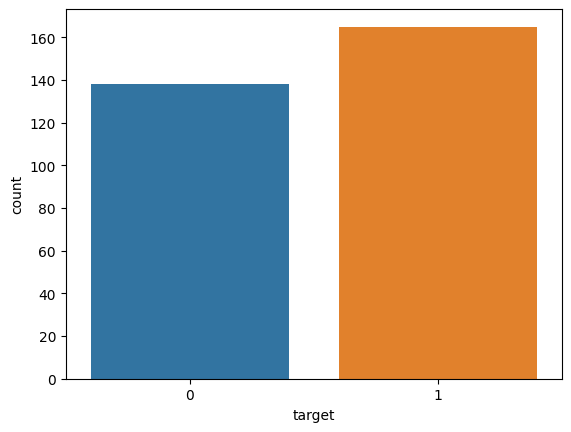

In [ ]:
sns.countplot(x="target",data=df)

<ipython-input-13-7e068e185e96>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

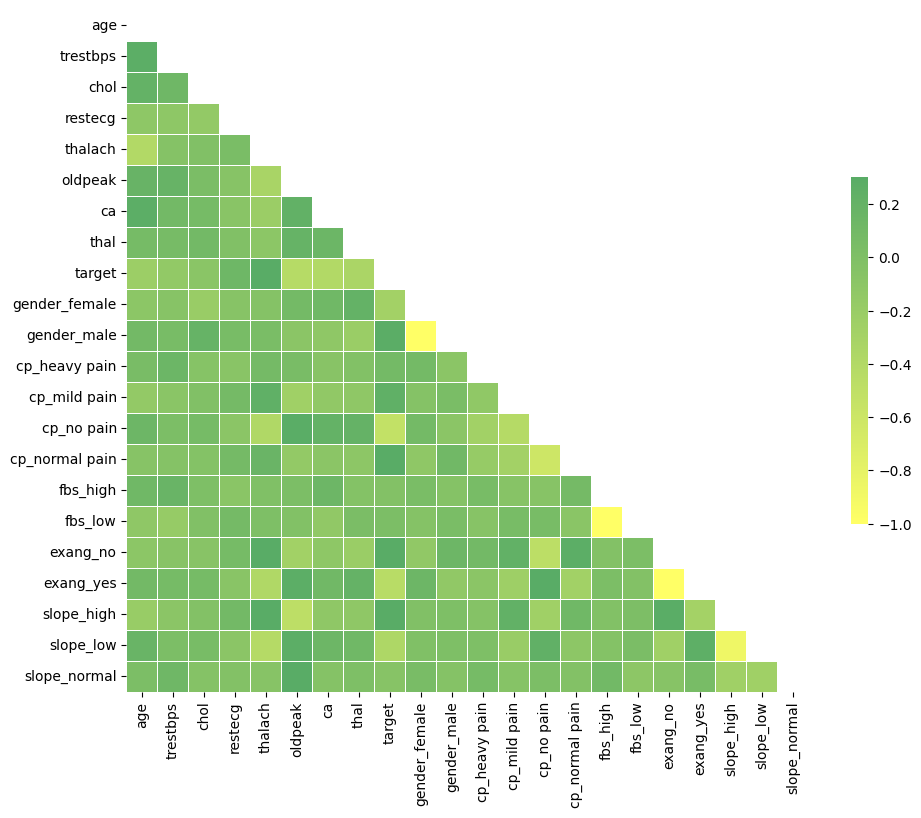

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop('target',1)
Y = df['target']

<ipython-input-15-f0239d110cba>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop('target',1)


In [ ]:
xgb = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.5, random_state=40)
y_pred = xgb.fit(X_train,y_train).predict(X_test)

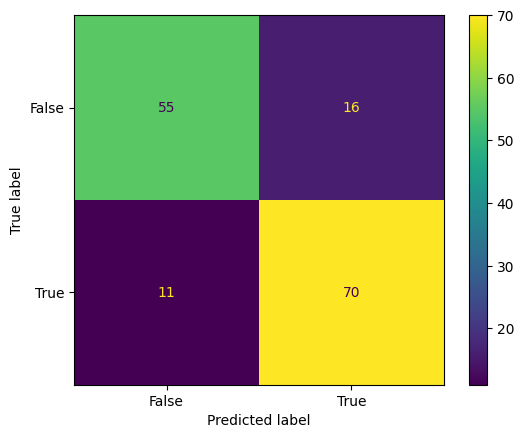

In [ ]:
def display_confusion_matrix(y_test,y_pred):
    matrix = metrics.confusion_matrix(y_test,y_pred)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test,y_pred)

In [ ]:
import math
def displayMetrics(y_test,y_pred):
    precision = metrics.precision_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    specificity = metrics.recall_score(y_test,y_pred,pos_label = 0)
    G_mean = math.sqrt(recall * specificity)
    print({"Precision":precision,"Recall":recall,"F1_score":f1_score,"G Mean":G_mean})
displayMetrics(y_test,y_pred)

{'Precision': 0.813953488372093, 'Recall': 0.8641975308641975, 'F1_score': 0.8383233532934131, 'G Mean': 0.8181985037351994}


In [ ]:
def feature_imp(df,model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: ylabel='feature'>

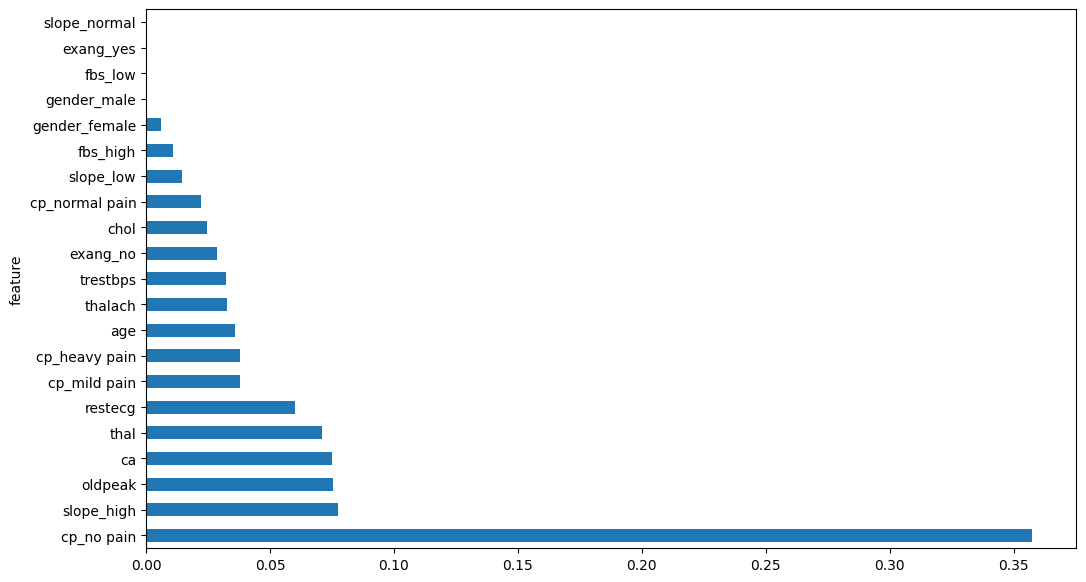

In [ ]:
feature_imp(X,xgb).plot('feature', 'importance', 'barh', figsize=(12,7), legend=False)

In [ ]:
X_new=df[['restecg','thal','ca','oldpeak','slope_high','cp_no pain']]
Y_new = df['target']

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,Y_new, test_size=0.5, random_state=40)
y_pred_new = xgb.fit(X_train_new,y_train_new).predict(X_test_new)

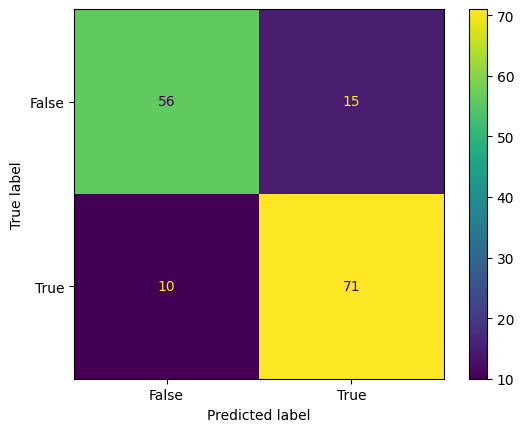

In [ ]:
display_confusion_matrix(y_test_new,y_pred_new)

In [ ]:
displayMetrics(y_test_new,y_pred_new)

{'Precision': 0.8255813953488372, 'Recall': 0.8765432098765432, 'F1_score': 0.8502994011976048, 'G Mean': 0.8314794192830981}
